In [5]:
import os
import numpy as np
import torch
import torch.nn as nn
import torchvision
from torchvision import datasets,transforms,models
import torch.optim as optim
from torch.utils.data import dataset,DataLoader
import matplotlib.pyplot as plt

In [7]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [8]:
# ADD transformations:
transformations = transforms.Compose([ transforms.Resize((200,200)),
                                transforms.ToTensor(),
                                transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

In [23]:
#Dataset downloaded from google images

#import train dataset
train_dataset = datasets.ImageFolder(root = "data",
                                     transform = transformations
                                    )

#Load dataset, specify batch size
train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                          batch_size = 32,
                                          shuffle = True
                                          )

#loop through all images where each image is img and label for happy = 0, sad =1
images = iter(train_loader)
img , label = next(images)

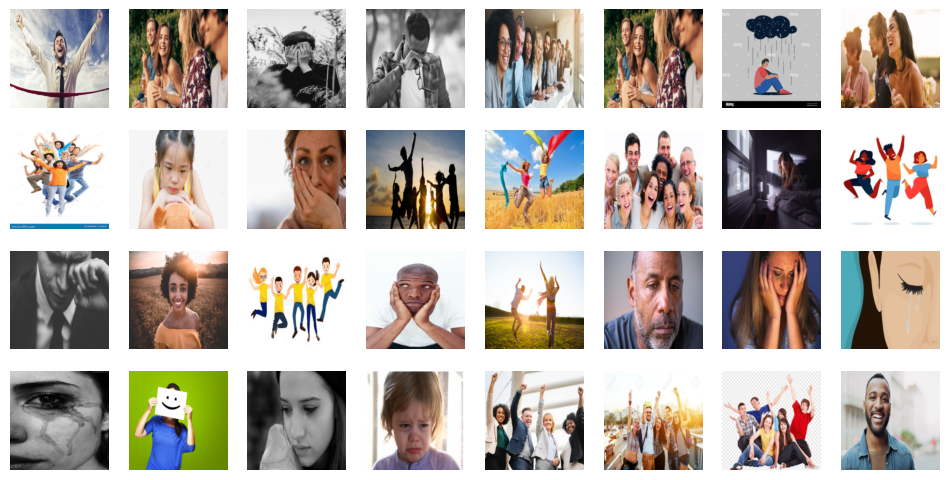

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Get a batch of images and labels
images = iter(train_loader)
img, label = next(images)

# Unnormalize the images (since they were normalized with mean=0.5, std=0.5)
# To visualize, we need to reverse the normalization
img = img / 2 + 0.5  # Unnormalize the image back to the range [0, 1]

# Convert the image tensor to numpy array
img = img.numpy()

# Plot the images
fig, axes = plt.subplots(4, 8, figsize=(12, 6))
axes = axes.ravel()

for i in np.arange(32):  # Since batch size is 32
    axes[i].imshow(np.transpose(img[i], (1, 2, 0)))  # Convert from (Color, Height, Width) to (Height, Width, Color)
    axes[i].axis('off')

plt.show()

In [12]:
# Load the pre-trained ResNet18 model
model = models.resnet18(pretrained=False)  # Don't load pre-trained weights
model.fc = nn.Linear(model.fc.in_features, 2)  # Adjust for 2 classes (happy, sad)

# Load the saved model weights
model.load_state_dict(torch.load('image_classifier_transfer_learning.pth'))  # Ensure this path points to your saved model

# Set the model to evaluation mode initially
model.eval()

# Move model to device (GPU or CPU)
model = model.to(device)

# Define the optimizer and loss function
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
criterion = nn.CrossEntropyLoss()

# Set the model to training mode
model.train()

C:\Users\user\AppData\Local\Temp\ipykernel_6560\2422105960.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('image_classifier_transfer_le

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [13]:
# Train the model
num_epochs = 15
for epoch in range(num_epochs):
    for i, (img, labels) in enumerate(train_loader):
        #print(f"Epoch {epoch+1}/{num_epochs} starting...")
        # fetches all layers from model ResNet FC layers only
        images = img.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 5 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/15], Loss: 0.3130
Epoch [2/15], Loss: 0.0181
Epoch [3/15], Loss: 0.0017
Epoch [4/15], Loss: 0.0229
Epoch [5/15], Loss: 0.0162
Epoch [6/15], Loss: 0.0000
Epoch [7/15], Loss: 0.0006
Epoch [8/15], Loss: 0.0002
Epoch [9/15], Loss: 0.0001
Epoch [10/15], Loss: 0.0000
Epoch [11/15], Loss: 0.0001
Epoch [12/15], Loss: 0.0001
Epoch [13/15], Loss: 0.0003
Epoch [14/15], Loss: 0.0001
Epoch [15/15], Loss: 0.0001


In [14]:
# Save the model's state_dict directly
torch.save(model.state_dict(), 'retrained_image_classifier.pth')

In [15]:
model.load_state_dict(torch.load('retrained_image_classifier.pth'))
model.eval()  # Set the model to evaluation mode (important for inference)

C:\Users\user\AppData\Local\Temp\ipykernel_6560\3986188539.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('retrained_image_classifier.p

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

The predicted class is: sad


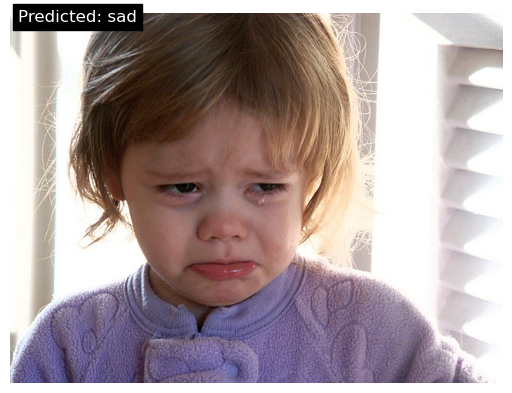

In [22]:
# *TO TEST ON SINGLE IMAGE*
from PIL import Image
from torchvision.transforms import transforms
transform = transforms.Compose([ transforms.Resize((200,200)),
                                transforms.ToTensor(),
                                transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

img = Image.open('test_images/sad_3.jpg') 
img_tensor = transform(img).unsqueeze(0).to('cpu')

# Perform inference
with torch.no_grad():
    output = model(img_tensor)

# Get the predicted class
_, predicted_class = output.max(1)

# Map the predicted class to the class name
class_names = ['happy', 'sad']  # Make sure these class names match your training data
predicted_class_name = class_names[predicted_class.item()]

print(f'The predicted class is: {predicted_class_name}')

test_image = np.array(img)
plt.imshow(test_image)
plt.axis('off')
plt.text(10, 10, f'Predicted: {predicted_class_name}', fontsize=12, color='white', backgroundcolor='black')
plt.show()

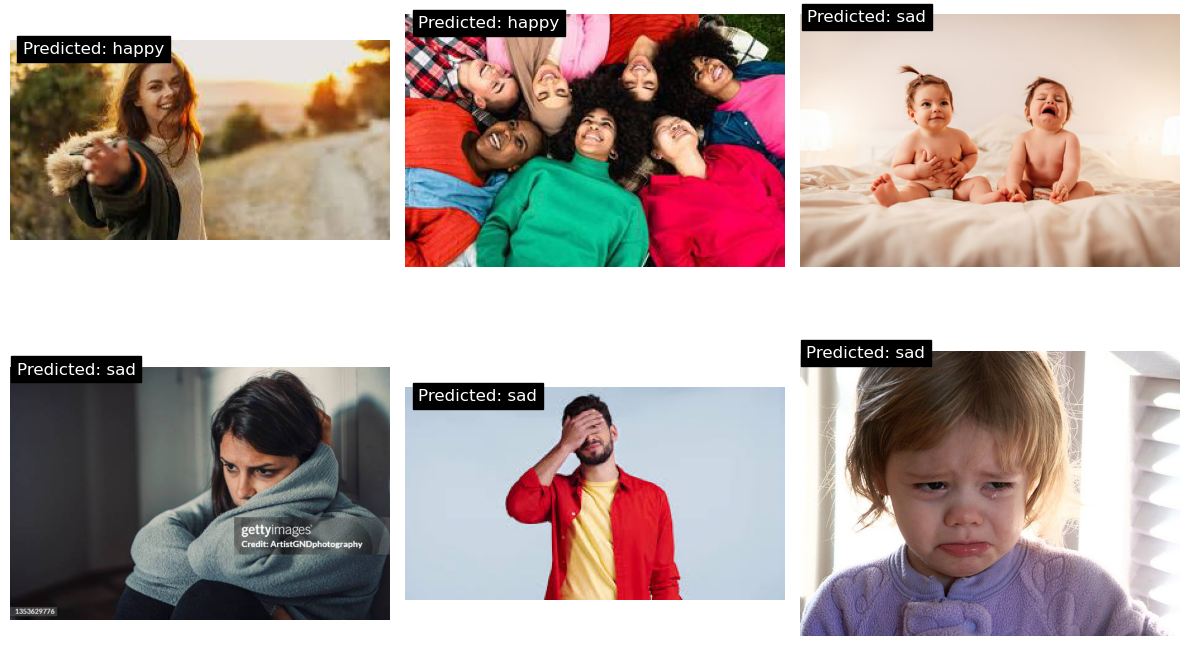

In [21]:
# Define the transform to be applied to the images
transform = transforms.Compose([ 
    transforms.Resize((200, 200)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Move model to CPU if necessary
device = torch.device('cpu')
model = model.to(device)

# Set path to your image folder
image_folder = "test_images"  

# List all image files in the folder
image_files = [i for i in os.listdir(image_folder) if i.endswith(('png', 'jpg', 'jpeg'))]

# Set the grid size for plotting (2 rows, 3 columns)
rows = 2
cols = 3
num_images = len(image_files)

# Create a figure for the grid with a fixed size
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed

# Loop through each image in the folder
for idx, image_file in enumerate(image_files):
    # Check if the number of images exceeds the grid size
    if idx >= rows * cols:
        break
    
    # Set the image path and open the image
    image_path = os.path.join(image_folder, image_file)
    img = Image.open(image_path)
    img_tensor = transform(img).unsqueeze(0).to(device)  # Apply transform and move to device

    # Perform inference
    with torch.no_grad():
        output = model(img_tensor)
    
    # Get the predicted class
    _, predicted_class = output.max(1)

    # Map the predicted class to the class name
    class_names = ['happy', 'sad']  # Adjust class names to match your model
    predicted_class_label = class_names[predicted_class.item()]

    # Plot the image in the grid
    plt.subplot(rows, cols, idx + 1)  # Create subplot at idx + 1 position
    test_image = np.array(img)
    plt.imshow(test_image)
    plt.axis('off')
    plt.text(10, 10, f'Predicted: {predicted_class_label}', fontsize=12, color='white', backgroundcolor='black')

# Adjust the layout to make sure there's no overlap
plt.tight_layout()
plt.show()